# Test Algo

A test-site for parts of the algo.

In [ ]:
import torch
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import umap
import matplotlib.pyplot as plt

from numpy.random import seed
seed(2211)
from tensorflow import set_random_seed
set_random_seed(2211)


class Autoencoder(nn.Module):
    def __init__(self):
        pass


In [ ]:
# import subprocess
# subprocess.check_output(['pip', 'list'])

b'Package                   Version\r\n------------------------- --------------\r\naiohttp                   3.9.5\r\naiosignal                 1.3.1\r\nannotated-types           0.7.0\r\nanyio                     4.4.0\r\nargon2-cffi               23.1.0\r\nargon2-cffi-bindings      21.2.0\r\narrow                     1.3.0\r\nasttokens                 2.4.1\r\nasync-lru                 2.0.4\r\nattrs                     23.2.0\r\nbabel                     2.16.0\r\nbeautifulsoup4            4.12.3\r\nbiopython                 1.84\r\nbleach                    6.1.0\r\ncertifi                   2024.6.2\r\ncffi                      1.17.1\r\ncharset-normalizer        3.3.2\r\nclick                     8.1.7\r\ncolorama                  0.4.6\r\ncomm                      0.2.2\r\ncontourpy                 1.3.0\r\ncycler                    0.12.1\r\ndebugpy                   1.8.6\r\ndecorator                 5.1.1\r\ndefusedxml                0.7.1\r\ndiscord                   2.3.2\r

Epoch 1/50, Loss: 0.0226
Epoch 2/50, Loss: 0.0082
Epoch 3/50, Loss: 0.0051
Epoch 4/50, Loss: 0.0042
Epoch 5/50, Loss: 0.0041
Epoch 6/50, Loss: 0.0041
Epoch 7/50, Loss: 0.0041
Epoch 8/50, Loss: 0.0041
Epoch 9/50, Loss: 0.0041
Epoch 10/50, Loss: 0.0041
Epoch 11/50, Loss: 0.0041
Epoch 12/50, Loss: 0.0040
Epoch 13/50, Loss: 0.0040
Epoch 14/50, Loss: 0.0039
Epoch 15/50, Loss: 0.0039
Epoch 16/50, Loss: 0.0039
Epoch 17/50, Loss: 0.0039
Epoch 18/50, Loss: 0.0039
Epoch 19/50, Loss: 0.0040
Epoch 20/50, Loss: 0.0040
Epoch 21/50, Loss: 0.0041
Epoch 22/50, Loss: 0.0042
Epoch 23/50, Loss: 0.0043
Epoch 24/50, Loss: 0.0043
Epoch 25/50, Loss: 0.0043
Epoch 26/50, Loss: 0.0042
Epoch 27/50, Loss: 0.0041
Epoch 28/50, Loss: 0.0041
Epoch 29/50, Loss: 0.0040
Epoch 30/50, Loss: 0.0040
Epoch 31/50, Loss: 0.0040
Epoch 32/50, Loss: 0.0040
Epoch 33/50, Loss: 0.0039
Epoch 34/50, Loss: 0.0039
Epoch 35/50, Loss: 0.0039
Epoch 36/50, Loss: 0.0039
Epoch 37/50, Loss: 0.0040
Epoch 38/50, Loss: 0.0040
Epoch 39/50, Loss: 0.

c:\Users\Broondan\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


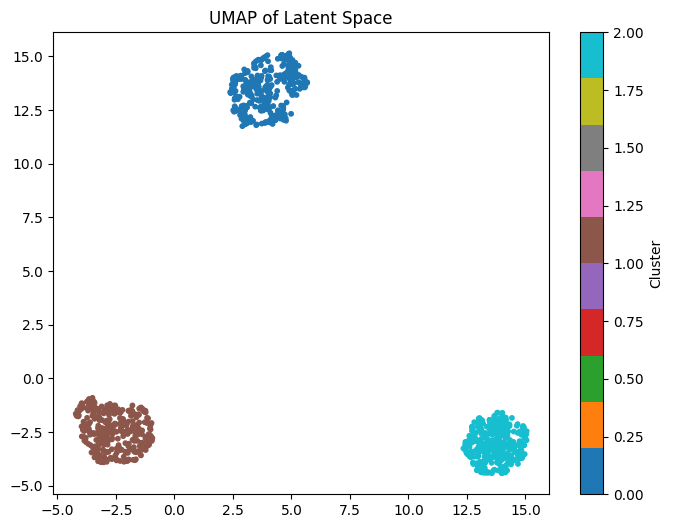

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import umap
import matplotlib.pyplot as plt

# Example Dataset: Simulated or Real Single-Cell Data
def generate_dummy_data(num_cells=1000, num_genes=200, num_clusters=3):
    np.random.seed(42)
    data = []
    for i in range(num_clusters):
        cluster = np.random.normal(loc=i, scale=0.5, size=(num_cells // num_clusters, num_genes))
        data.append(cluster)
    return np.vstack(data)

# Replace this with real scRNA-seq data
data = generate_dummy_data()
data = torch.tensor(data, dtype=torch.float32)

# Autoencoder Definition
class Autoencoder(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, latent_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.ReLU(),
            nn.Linear(128, input_dim)
        )

    def forward(self, x):
        latent = self.encoder(x)
        reconstructed = self.decoder(latent)
        return reconstructed, latent

# Initialize the Autoencoder
input_dim = data.shape[1]
latent_dim = 10  # Adjust latent dimensions as needed
model = Autoencoder(input_dim, latent_dim)

# Training Configuration
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 50
batch_size = 64

# Training Loop
model.train()
for epoch in range(num_epochs):
    epoch_loss = 0
    for i in range(0, data.size(0), batch_size):
        batch = data[i:i+batch_size]
        optimizer.zero_grad()
        reconstructed, _ = model(batch)
        loss = criterion(reconstructed, batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss/len(data):.4f}")

# Extract Latent Representations
model.eval()
_, latent_space = model(data)

# Convert to NumPy for Clustering
latent_space_np = latent_space.detach().numpy()

# K-means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(latent_space_np)

# Evaluate Clustering
sil_score = silhouette_score(latent_space_np, cluster_labels)
print(f"Silhouette Score: {sil_score:.4f}")

# Visualize Latent Space with UMAP
reducer = umap.UMAP(random_state=42)
latent_umap = reducer.fit_transform(latent_space_np)

plt.figure(figsize=(8, 6))
plt.scatter(latent_umap[:, 0], latent_umap[:, 1], c=cluster_labels, cmap='tab10', s=10)
plt.colorbar(label="Cluster")
plt.title("UMAP of Latent Space")
plt.show()